In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # use this for hi-dpi displays
sns.set_style('whitegrid')  # set the plotting style

# Central Limit Theorem

The sum of a large mumber of independent, random variables is typically normally distributed even if the distribution function of the random variable is not Gaussian.

## Simulate uniformly distributed data

Here, we will simulate a uniform distribution for rolling a 6-sided dice. Each time the dice is rolled, there is an euqal chance of the outcome being a number 1 - 6. 

Desprite the uniform distribution, we will show that the average sum is normally distributed (the average is also a random variable!)

In [3]:
# define number of times the dice is rolled
num_rolls = 400
num_sides = 6

# simulate n dice rolls for 6-sided dice 
d = np.random.randint(low = 1, high = num_sides + 1, size = num_rolls)
d

array([3, 3, 4, 5, 3, 6, 4, 5, 6, 4, 1, 1, 6, 5, 5, 2, 4, 5, 3, 3, 1, 6,
       3, 6, 3, 5, 1, 4, 6, 6, 4, 5, 2, 6, 6, 3, 1, 1, 2, 2, 2, 3, 5, 6,
       6, 3, 4, 2, 6, 5, 5, 2, 1, 5, 3, 6, 2, 2, 1, 1, 1, 6, 3, 5, 4, 5,
       3, 6, 6, 5, 5, 5, 3, 1, 2, 5, 5, 6, 3, 5, 2, 4, 1, 3, 6, 5, 5, 2,
       3, 2, 1, 6, 6, 3, 2, 6, 4, 5, 6, 6, 2, 2, 4, 5, 4, 2, 3, 1, 6, 5,
       6, 2, 3, 3, 6, 2, 6, 2, 1, 4, 4, 4, 5, 1, 4, 3, 4, 6, 4, 4, 4, 2,
       1, 4, 3, 4, 5, 5, 6, 5, 2, 5, 1, 2, 1, 4, 3, 3, 6, 6, 4, 1, 2, 2,
       5, 4, 5, 2, 1, 5, 3, 6, 2, 5, 2, 5, 4, 4, 5, 6, 4, 4, 4, 5, 1, 6,
       5, 1, 4, 2, 5, 5, 4, 3, 3, 2, 1, 4, 3, 6, 5, 1, 5, 6, 6, 3, 4, 3,
       4, 4, 2, 5, 2, 4, 6, 6, 6, 5, 3, 1, 6, 6, 5, 1, 5, 3, 1, 1, 3, 5,
       5, 5, 4, 5, 6, 4, 2, 3, 5, 2, 5, 1, 6, 3, 1, 4, 4, 4, 2, 1, 1, 4,
       3, 1, 5, 1, 3, 6, 6, 3, 5, 2, 1, 3, 2, 3, 3, 4, 2, 6, 1, 4, 6, 3,
       1, 2, 5, 4, 3, 2, 6, 4, 6, 4, 1, 1, 1, 1, 6, 2, 4, 6, 5, 4, 3, 3,
       4, 3, 2, 2, 3, 3, 5, 6, 4, 2, 1, 4, 1, 4, 2,

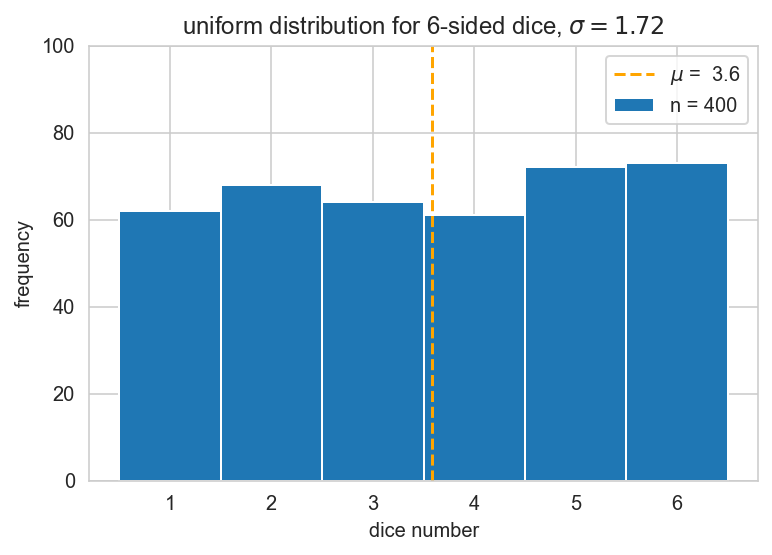

In [4]:
mean = np.average(d)
stdv = np.std(d)

# create an array of bins = sides + 2 
bins = np.arange(0, num_sides + 2, 1)
bin_centers = 0.5*(bins[1:]+bins[:-1])

plt.hist(d, bins = bin_centers, label = f'n = {num_rolls}')
plt.axvline(mean, linestyle = 'dashed', color = 'orange', label = f'$\mu$ = {mean: .1f}')
plt.ylim(0, 100)
plt.title(f'uniform distribution for 6-sided dice, $\sigma = {stdv: .2f}$')
plt.xlabel('dice number')
plt.ylabel('frequency')
plt.legend();

# What is the probability distribution for the average value?



In [5]:
# define number of rolls in each experiment
num_rolls = 400

# define number of times experiment is performed
num_exp = 1000

# simulate pseudo-random dice rolls and take the average value of each experiment 
ds = [np.average(np.random.randint(low = 1, high = num_sides + 1, size = num_rolls)) for i in range(num_exp)]

# show first 10 averages (random variables)
ds[:10]

[3.4225, 3.315, 3.54, 3.6075, 3.5175, 3.6125, 3.415, 3.61, 3.4725, 3.465]

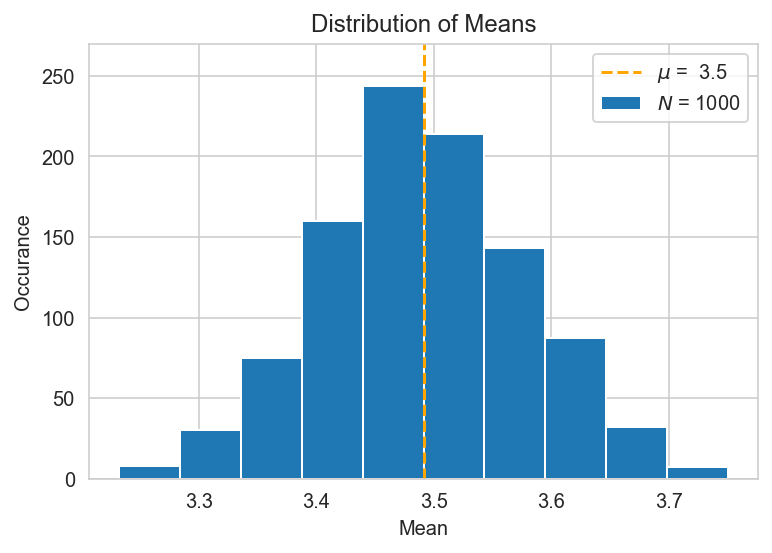

In [6]:
ds_mean = np.average(ds)
ymax = 250

plt.hist(ds, label = f'$N$ = {num_exp}')
plt.axvline(ds_mean, color = 'orange', linestyle = 'dashed', label = f'$\mu$ = {ds_mean: .1f}')
plt.ylim(bottom = 0, top = ymax + 20)
plt.title('Distribution of Means')
plt.ylabel('Occurance')
plt.xlabel('Mean')
plt.legend();